In [1]:
import sys
import os
sys.path.append(os.path.abspath("/data2/eranario/scratch/rgb-to-multispectral-unet"))

In [2]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

from src.dataset import PotatoDataset
from torch.utils.data import DataLoader

In [3]:
img_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images/Train_Images"
label_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images/Train_Labels_XML"

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [5]:
dataset = PotatoDataset(img_dir, label_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

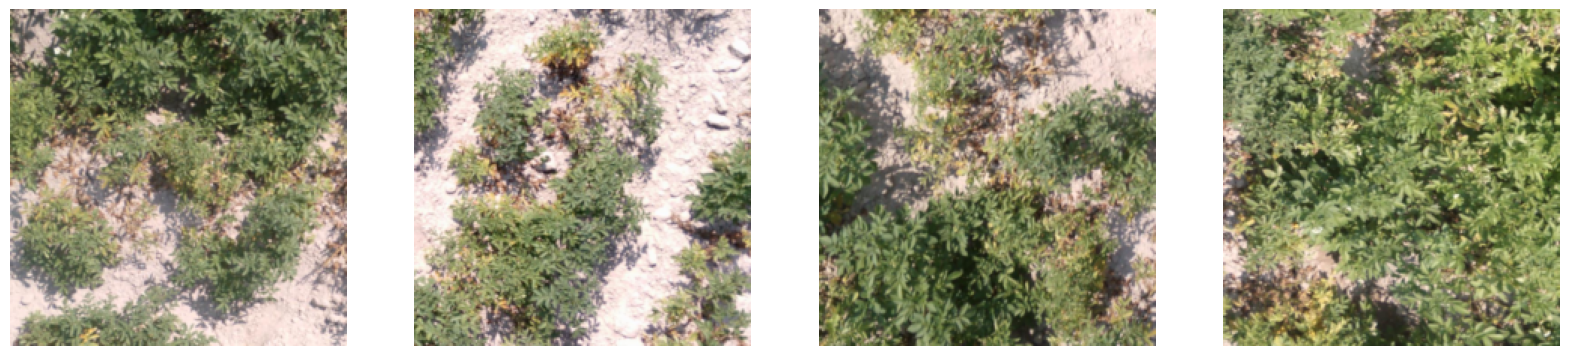

In [6]:
def show_images(images):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Display 4 images in a row
    
    for i, image in enumerate(images):
        image = F.to_pil_image(image)
        
        # Plot the image
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
    
    plt.show()

for images, _ in dataloader:
    show_images(images)
    break  # Show only the first batch